In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
%matplotlib inline

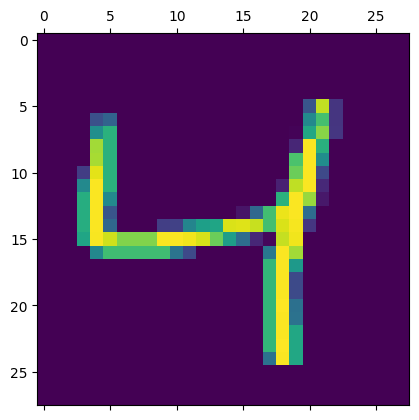

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

In [15]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
#simple neural network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 4:00 128ms/step - accuracy: 0.0000e+00 - loss: 2.4840

/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 213us/step - accuracy: 0.8148 - loss: 0.7180
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.9134 - loss: 0.3108
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9203 - loss: 0.2913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9245 - loss: 0.2709
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9267 - loss: 0.2631


In [17]:
model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.9149 - loss: 0.3053


[0.26886627078056335, 0.9261999726295471]

In [18]:
model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step


array([[2.9627427e-02, 5.1370512e-07, 4.6889927e-02, ..., 9.9978161e-01,
        7.9672478e-02, 5.7898974e-01],
       [4.7358942e-01, 1.0447807e-02, 9.9926054e-01, ..., 5.8177237e-13,
        1.4128107e-01, 2.2990718e-09],
       [5.0471828e-04, 9.9442440e-01, 6.2587929e-01, ..., 1.3354008e-01,
        4.0909877e-01, 4.0744849e-02],
       ...,
       [5.3958956e-06, 6.2496388e-06, 7.0145476e-04, ..., 2.3684795e-01,
        4.9054191e-01, 7.3551941e-01],
       [1.3160129e-04, 2.2312324e-04, 1.0867263e-04, ..., 4.2937245e-05,
        5.9582514e-01, 6.4267551e-05],
       [1.1911671e-02, 3.6896061e-10, 1.3945602e-01, ..., 1.6205181e-08,
        1.5063489e-04, 3.6717685e-07]], dtype=float32)

In [19]:
y_predicted = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step


In [20]:
y_predicted[0]

array([2.9627427e-02, 5.1370512e-07, 4.6889927e-02, 9.5583850e-01,
       2.6193473e-03, 1.1107212e-01, 1.4340609e-06, 9.9978161e-01,
       7.9672478e-02, 5.7898974e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
y_pred_labels = [np.argmax(i) for i in y_predicted]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   7,   13,  914,   16,    8,    4,   13,   11,   43,    3],
       [   4,    0,   14,  919,    0,   30,    3,   11,   23,    6],
       [   2,    1,    3,    1,  926,    0,   10,    4,    9,   26],
       [  11,    3,    3,   27,   12,  781,   14,    7,   29,    5],
       [  14,    3,    5,    1,    8,   12,  911,    2,    2,    0],
       [   1,    7,   20,    8,    6,    0,    0,  963,    3,   20],
       [  10,   10,    5,   20,    9,   28,    8,   14,  865,    5],
       [  11,    7,    1,    9,   37,    9,    0,   30,    5,  900]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

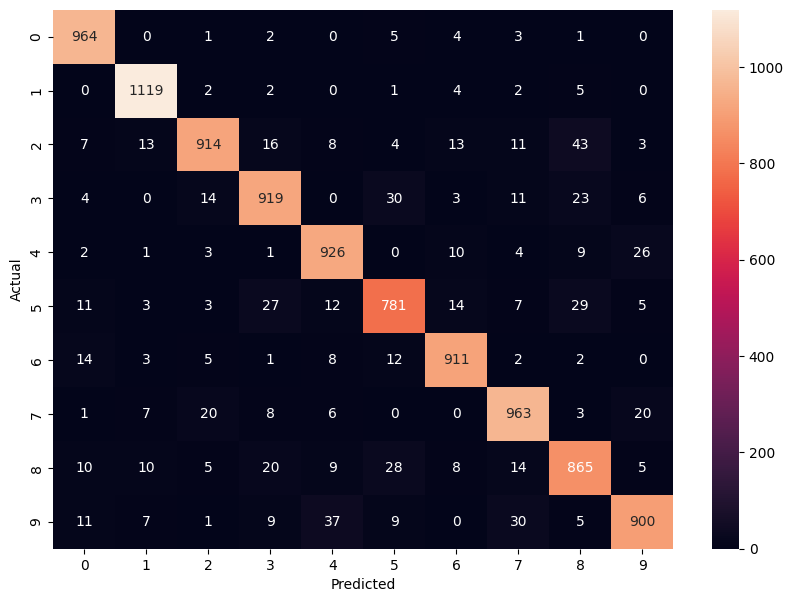

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5


/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8690 - loss: 0.4603
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.9615 - loss: 0.1298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9750 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.9810 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.9863 - loss: 0.0491


In [26]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.9709 - loss: 0.0947


[0.08045705407857895, 0.9753000140190125]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


Text(95.72222222222221, 0.5, 'Actual')

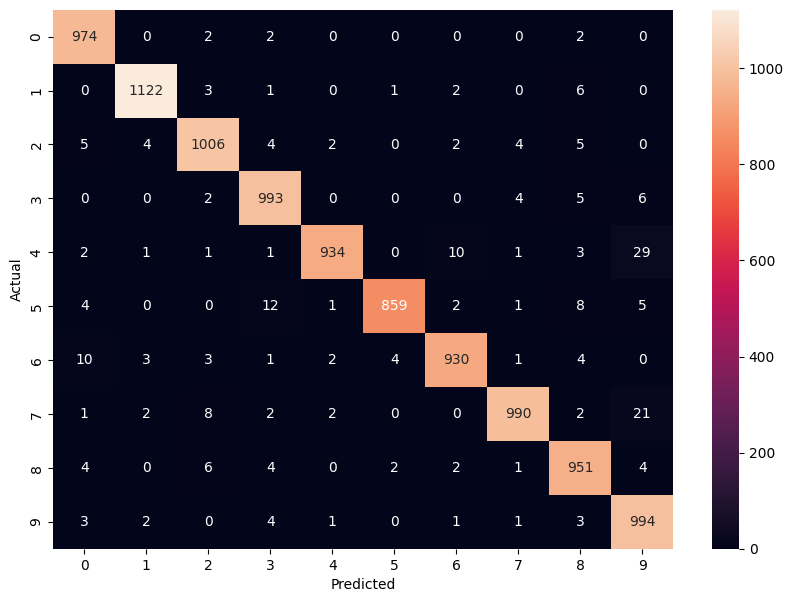

In [27]:
y_predicted = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5


/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8780 - loss: 0.4444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.9616 - loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9750 - loss: 0.0846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9815 - loss: 0.0637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9842 - loss: 0.0497


In [32]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.9695 - loss: 0.0936


[0.0789942517876625, 0.9742000102996826]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


Text(95.72222222222221, 0.5, 'Actual')

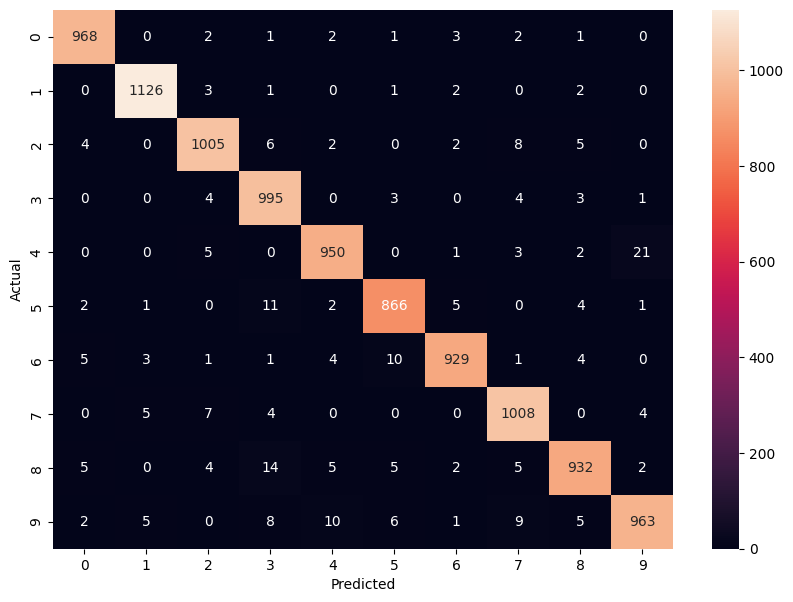

In [33]:
y_predicted = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')